<a href="https://colab.research.google.com/github/gevosa/MATH250---Intro-to-Statistical-Programming/blob/master/data_preprocessing_and_initial_steps_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages and the Dataset


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [83]:
data = pd.read_csv('/content/drive/My Drive/AirBnb Project/listings.csv',index_col=['id'],parse_dates = ['last_scraped','first_review','last_review']) 
### index_col=['id'] assigns the 'id' columns as the index of the new pandas dataframe 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
data.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1947,https://www.airbnb.com/rooms/1947,20200423041458,2020-04-23,Furnished Gold Coast studio #806,Cozy studio apartment in vintage renovated co...,This is a perfect apartment and location for a...,Cozy studio apartment in vintage renovated co...,none,This location is so convenient. You can walk t...,The building office does not manage this apart...,You're steps away from the red line train and ...,Once you arrive it's like living in your own a...,I live in Indiana and don't always see my gues...,"This is a residential condo building, so I wou...",NaN,NaN,https://a0.muscache.com/im/pictures/40d375a8-5...,NaN,2153,https://www.airbnb.com/users/show/2153,Linda,2008-08-16,"Munster, Indiana, United States",I'm a former university administrator who saw ...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/3c130...,https://a0.muscache.com/im/pictures/user/3c130...,River North,4,4,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Chicago, IL, United States",Near North Side,Near North Side,NaN,...,$0.00,14,60,14,18,60,60,14.2,60.0,5 weeks ago,t,0,3,3,3,2020-04-23,4,2,2015-03-01,2020-03-29,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,R18000024411,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,7,7,0,0,0.06
2384,https://www.airbnb.com/rooms/2384,20200423041458,2020-04-23,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,The basement laundry room hours are 8:00am to ...,UNIVERSITY OF CHICAGO: Visiting academics and ...,You will have access to the entire apartment -...,I will greet you when you arrive and show you ...,1. Your booking is for ONE (1) person only - t...,NaN,NaN,https://a0.muscache.com/im/pictures/acf6b3c0-4...,NaN,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1,1,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Chicago, IL, United States",Hyde Park,Hyde Park,NaN,...,$0.00,2,90,2,2,1125,1125,2.0,1125.0,5 weeks ago,t,22,50,77,322,2020-04-23,178,30,2015-01-09,2019-12-15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Ill

# Handling missing, invalid, and unimportant data

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 1947 to 43255785
Columns: 105 entries, listing_url to reviews_per_month
dtypes: datetime64[ns](3), float64(20), int64(22), object(60)
memory usage: 6.9+ MB


In [86]:
data.columns # emits columns in middle if dataset too large 
# list(data) for the full list of features 

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=105)

In [87]:
to_drop = ['listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered',
           'neighborhood_overview','notes','transit','access',	'interaction',	'house_rules',	'thumbnail_url',	
           'medium_url',	'picture_url',	'xl_picture_url',	'host_id','host_url','host_name',	'host_since'	,
           'host_location',	'host_about',	'host_response_time','host_is_superhost',	'host_thumbnail_url',	'host_picture_url',	
           'host_neighbourhood',	'host_total_listings_count',	'host_verifications',	'host_has_profile_pic',	
           'host_identity_verified',	'street',	'neighbourhood',	'neighbourhood_group_cleansed',
           'host_response_rate',	'host_acceptance_rate','city',	'state'	,'zipcode',	'market',	'smart_location',	'country_code',
           'country','is_location_exact',	'amenities','calendar_updated',	'has_availability',
           'calendar_last_scraped','requires_license',	'license',	'jurisdiction_names',	'instant_bookable',	'is_business_travel_ready',	
           'require_guest_profile_picture',	'require_guest_phone_verification','first_review','last_review']
data = data.drop(columns=to_drop)
data.head()

,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1947,4,Near North Side,41.90246,-87.63405,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,$59.00,$500.00,NaN,$100.00,$0.00,1,$0.00,14,60,14,18,60,60,14.2,60.0,0,3,3,3,4,2,93.0,10.0,9.0,10.0,10.0,10.0,9.0,moderate,7,7,0,0,0.06
2384,1,Hyde Park,41.78790,-87.58780,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,NaN,$55.00,$350.00,NaN,$0.00,$20.00,1,$0.00,2,90,2,2,1125,1125,2.0,1125.0,22,50,77,322,178,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,1,0,1,0,2.76
4505,1,South Lawndale,41.85495,-87.69696,Apartment,Entire home/apt,7,1.0,3.0,5.0,Real Bed,NaN,$117.00,$925.00,NaN,$0.00,$30.00,2,$20.00,2,60,2,2,60,60,2.0,60.0,0,13,31,146,394,27,96.0,10.0,9.0,10.0,10.0,9.0,9.0,moderate,1,1,0,0,2.91
7126,2,West Town,41.90289,-87.68182,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,NaN,$80.00,$600.00,NaN,$0.00,$0.00,1,$0.00,2,60,2,2,60,60,2.0,60.0,29,55,82,335,384,48,93.0,10.0,9.0,10.0,10.0,10.0,10.0,moderate,1,1,0,0,2.92
9811,10,Lincoln Park,41.91769,-87.63788,Apartment,Entire home/apt,4,1.0,1.0,0.0,Real Bed,NaN,$150.00,"$1,050.00","$3,400.00",$0.00,$85.00,3,$25.00,4,180,4,4,180,180,4.0,180.0,4,27,57,320,49,16,92.0,10.0,9.0,10.0,9.0,10.0,9.0,moderate,11,11,0,0,0.67


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 1947 to 43255785
Data columns (total 46 columns):
host_listings_count                             8520 non-null int64
neighbourhood_cleansed                          8520 non-null object
latitude                                        8520 non-null float64
longitude                                       8520 non-null float64
property_type                                   8520 non-null object
room_type                                       8520 non-null object
accommodates                                    8520 non-null int64
bathrooms                                       8516 non-null float64
bedrooms                                        8514 non-null float64
beds                                            8479 non-null float64
bed_type                                        8520 non-null object
square_feet                                     47 non-null float64
price                                           8520 non

As we can see all the variables are either of type 'int64' or 'float 64' both representing numerical values. However there are some variables of type 'object'. 


In [89]:
# dropping the dollar sign and transorming it to floats 
data['cleaning_fee'] = data['cleaning_fee'].str.replace('$','').str.replace(',','').astype(float)
data['price'] = data['price'].str.replace('$','').str.replace(',','').astype(float)
data['security_deposit'] = data['security_deposit'].str.replace('$','').str.replace(',','').astype(float)
data['extra_people'] = data['extra_people'].str.replace('$','').str.replace(',','').astype(float)
data['weekly_price'] = data['weekly_price'].str.replace('$','').str.replace(',','').astype(float)
data['monthly_price'] = data['monthly_price'].str.replace('$','').str.replace(',','').astype(float)

In [90]:
cat_cols_to_drop = ['neighbourhood_cleansed','property_type','room_type','bed_type','cancellation_policy']
data_num = data.drop(columns = cat_cols_to_drop)
data_all = data
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 1947 to 43255785
Data columns (total 46 columns):
host_listings_count                             8520 non-null int64
neighbourhood_cleansed                          8520 non-null object
latitude                                        8520 non-null float64
longitude                                       8520 non-null float64
property_type                                   8520 non-null object
room_type                                       8520 non-null object
accommodates                                    8520 non-null int64
bathrooms                                       8516 non-null float64
bedrooms                                        8514 non-null float64
beds                                            8479 non-null float64
bed_type                                        8520 non-null object
square_feet                                     47 non-null float64
price                                           8520 non

In [91]:
pip install feature_selector # is necessary 

In [92]:
# pip install feature_selector 
from feature_selector import FeatureSelector
# Features are in train and labels (a.k.a. target) are in train_labels
fs = FeatureSelector(data = data_num.drop(columns='price'), labels = data_num['price'])

# fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
#                                    'task': 'classification', 'eval_metric': 'auc', 
#                                     'cumulative_importance': 0.99})

In [93]:
# identify_missing class of FeatureSelector object collects the information about the missing data above a certain threshold. If you want to see variables even with 1 missing value set missing_threshold = 0 as below
fs.identify_missing(missing_threshold=0)

16 features with greater than 0.00 missing values.



In [94]:
# outputs the list of columns with missing values 
fs.ops['missing']

['bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

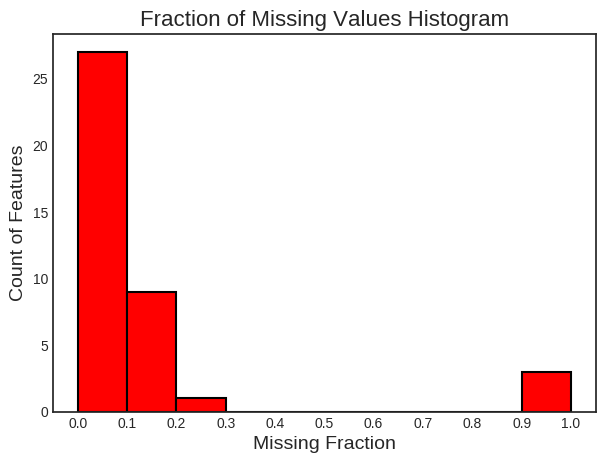

In [95]:
fs.plot_missing()

As we can see the distribution of missing values varies for different columns. For example the right-most bar represents 3 columns where more than 90% of the data is missing.  

In [96]:
fs.missing_stats

,missing_fraction
square_feet,0.994484
monthly_price,0.942019
weekly_price,0.940493
security_deposit,0.249648
review_scores_communication,0.164437
review_scores_location,0.164437
review_scores_value,0.164437
review_scores_checkin,0.164437
review_scores_cleanliness,0.164202
review_scores_accuracy,0.164202


In [97]:
to_drop = ['square_feet','monthly_price','weekly_price']

In [98]:
fs.identify_collinear(correlation_threshold=0.8)

11 features with a correlation magnitude greater than 0.80.



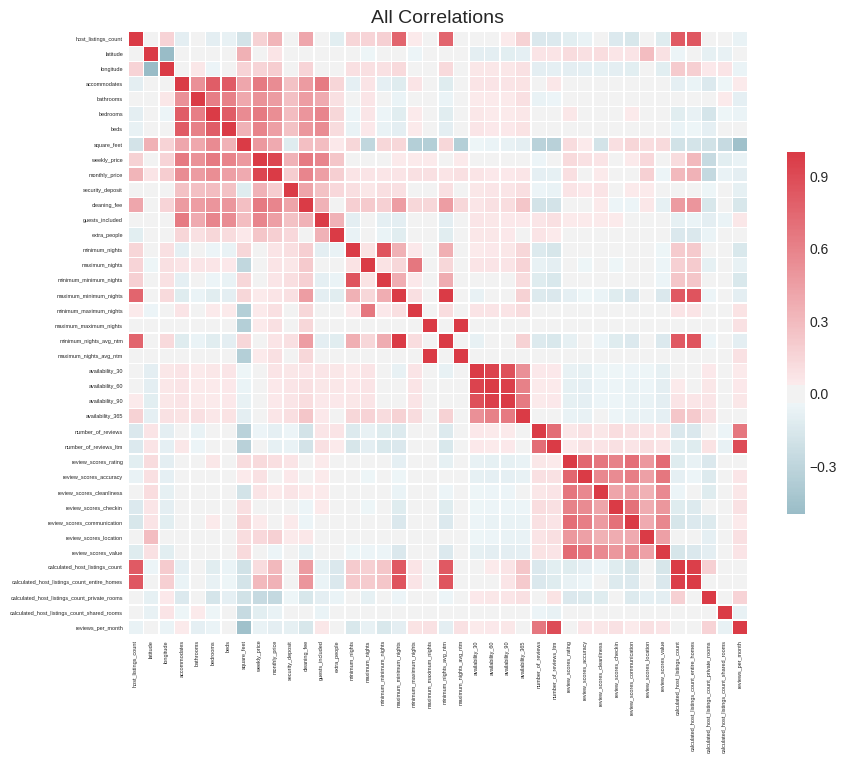

In [99]:
fs.plot_collinear(plot_all=True)


In [100]:
correlated_features = fs.ops['collinear']
correlated_features

['bedrooms',
 'beds',
 'monthly_price',
 'minimum_minimum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_60',
 'availability_90',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'reviews_per_month']

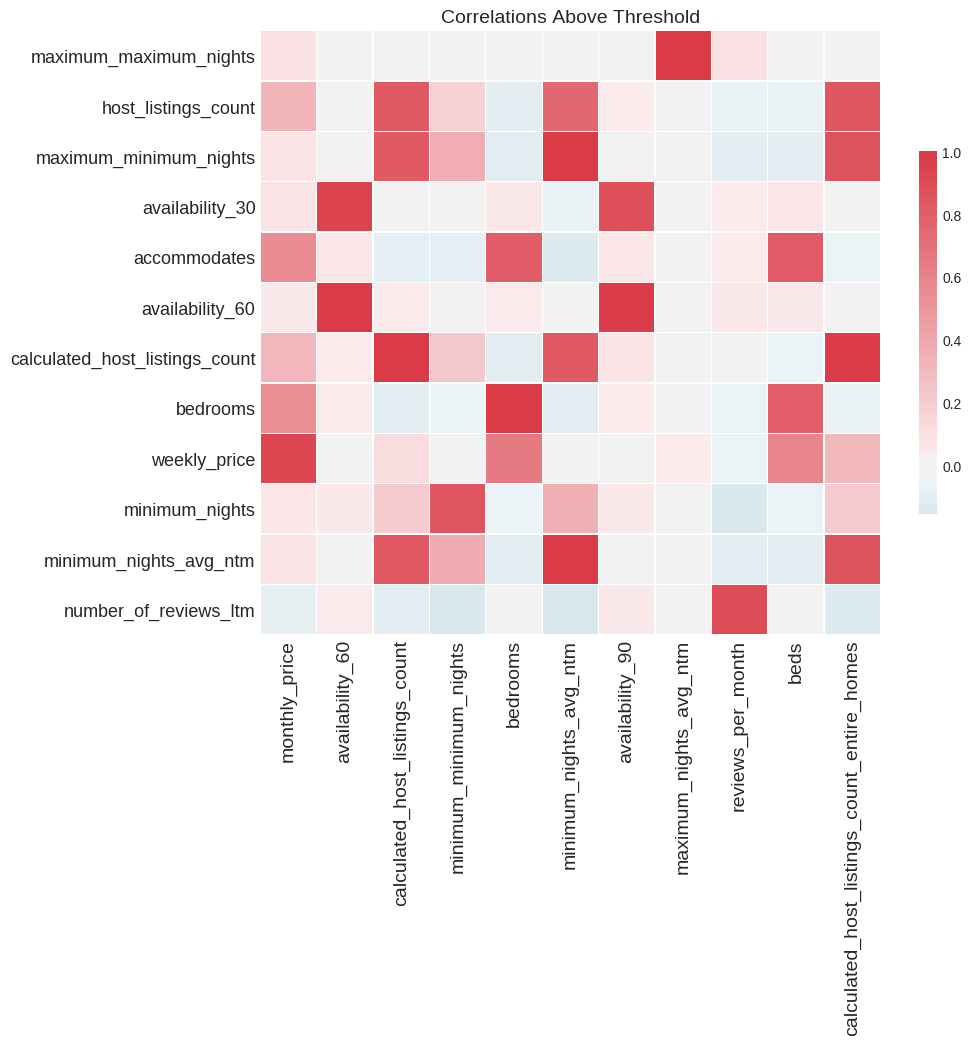

In [101]:
fs.plot_collinear()

In [102]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,bedrooms,accommodates,0.802058
1,beds,accommodates,0.814737
2,beds,bedrooms,0.801243
3,monthly_price,weekly_price,0.931368
4,minimum_minimum_nights,minimum_nights,0.854081
5,minimum_nights_avg_ntm,maximum_minimum_nights,0.998960
6,maximum_nights_avg_ntm,maximum_maximum_nights,1.000000
7,availability_60,availability_30,0.947207
8,availability_90,availability_30,0.879800
9,availability_90,availability_60,0.973730


In [103]:
to_drop.extend(correlated_features)
to_drop

['square_feet',
 'monthly_price',
 'weekly_price',
 'bedrooms',
 'beds',
 'monthly_price',
 'minimum_minimum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_60',
 'availability_90',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'reviews_per_month']

In [104]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[382]	valid_0's l2: 86169.3
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 54426.2
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[135]	valid_0's l2: 289101
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[980]	valid_0's l2: 133841
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[997]	valid_0's l2: 62613.4
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[977]	valid_0's l2: 61899.8
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 141495
Training until valid

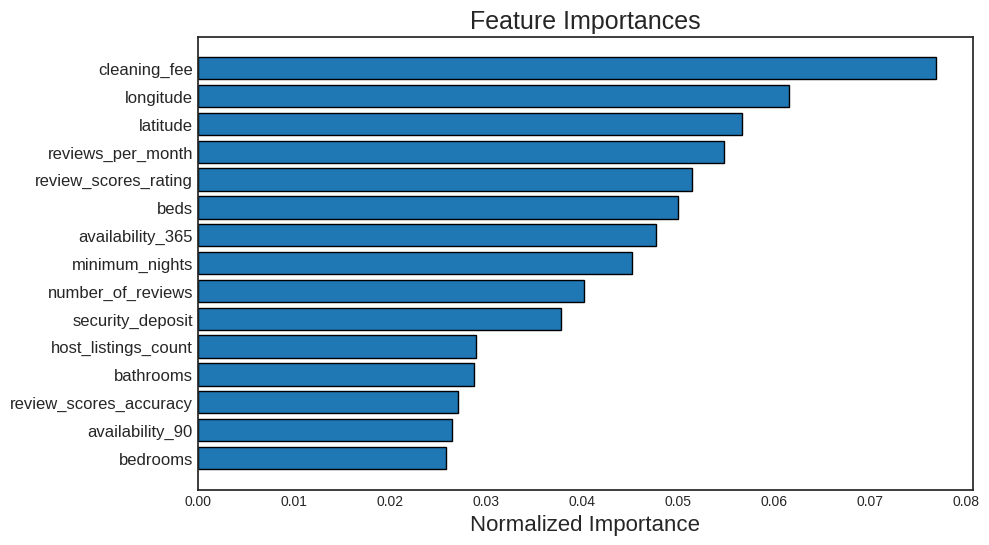

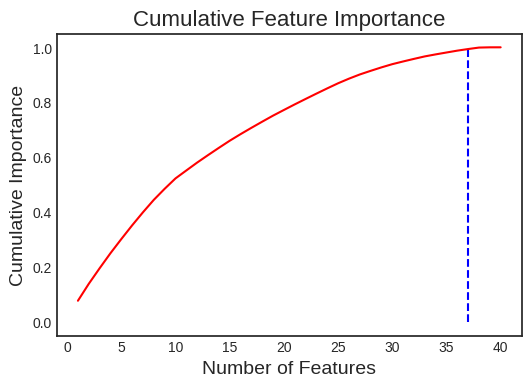

37 features required for 0.99 of cumulative importance


In [105]:
fs.plot_feature_importances(threshold = 0.99)

In [106]:
fs.feature_importances

,feature,importance,normalized_importance,cumulative_importance
0,cleaning_fee,1326.0,0.076883,0.076883
1,longitude,1062.8,0.061622,0.138505
2,latitude,977.1,0.056653,0.195159
3,reviews_per_month,945.0,0.054792,0.249951
4,review_scores_rating,887.9,0.051481,0.301432
5,beds,862.5,0.050009,0.351441
6,availability_365,822.4,0.047684,0.399124
7,minimum_nights,780.6,0.045260,0.444385
8,number_of_reviews,693.9,0.040233,0.484618
9,security_deposit,652.4,0.037827,0.522444


In [107]:
fs.identify_low_importance(cumulative_importance = 0.99)

36 features required for cumulative importance of 0.99 after one hot encoding.
4 features do not contribute to cumulative importance of 0.99.



In [108]:
fs.ops['low_importance']

['maximum_nights_avg_ntm',
 'review_scores_location',
 'calculated_host_listings_count_shared_rooms',
 'square_feet']

In [109]:
to_drop.extend(fs.ops['low_importance'])

In [110]:
to_drop

['square_feet',
 'monthly_price',
 'weekly_price',
 'bedrooms',
 'beds',
 'monthly_price',
 'minimum_minimum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_60',
 'availability_90',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'reviews_per_month',
 'maximum_nights_avg_ntm',
 'review_scores_location',
 'calculated_host_listings_count_shared_rooms',
 'square_feet']

In [111]:
data_num.isnull().sum()

host_listings_count                                0
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          4
bedrooms                                           6
beds                                              41
square_feet                                     8473
price                                              0
weekly_price                                    8013
monthly_price                                   8026
security_deposit                                2127
cleaning_fee                                     857
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                        

In [112]:
_ = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','guests_included','maximum_maximum_nights','calculated_host_listings_count_private_rooms']
to_drop.extend(_)
to_drop

['square_feet',
 'monthly_price',
 'weekly_price',
 'bedrooms',
 'beds',
 'monthly_price',
 'minimum_minimum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_60',
 'availability_90',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'reviews_per_month',
 'maximum_nights_avg_ntm',
 'review_scores_location',
 'calculated_host_listings_count_shared_rooms',
 'square_feet',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'guests_included',
 'maximum_maximum_nights',
 'calculated_host_listings_count_private_rooms']

In [113]:
data_all = data_all.drop(columns=to_drop)
data_num = data_num.drop(columns=to_drop)

In [114]:
# for only numerical data:
data_num['security_deposit'] = data_num['security_deposit'].fillna(0)
data_num['cleaning_fee'] = data_num['cleaning_fee'].fillna(0)
data_num = data_num.dropna(subset=['bathrooms'])

# for the whole data 
data_all['security_deposit'] = data_all['security_deposit'].fillna(0)
data_all['cleaning_fee'] = data_all['cleaning_fee'].fillna(0)
data_all = data_all.dropna(subset=['bathrooms'])

In [115]:
data_num.isnull().sum()

host_listings_count       0
latitude                  0
longitude                 0
accommodates              0
bathrooms                 0
price                     0
security_deposit          0
cleaning_fee              0
extra_people              0
minimum_nights            0
maximum_nights            0
maximum_minimum_nights    0
minimum_maximum_nights    0
availability_30           0
availability_365          0
number_of_reviews         0
number_of_reviews_ltm     0
dtype: int64

In [116]:
data_all.isnull().sum()

host_listings_count       0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
price                     0
security_deposit          0
cleaning_fee              0
extra_people              0
minimum_nights            0
maximum_nights            0
maximum_minimum_nights    0
minimum_maximum_nights    0
availability_30           0
availability_365          0
number_of_reviews         0
number_of_reviews_ltm     0
cancellation_policy       0
dtype: int64

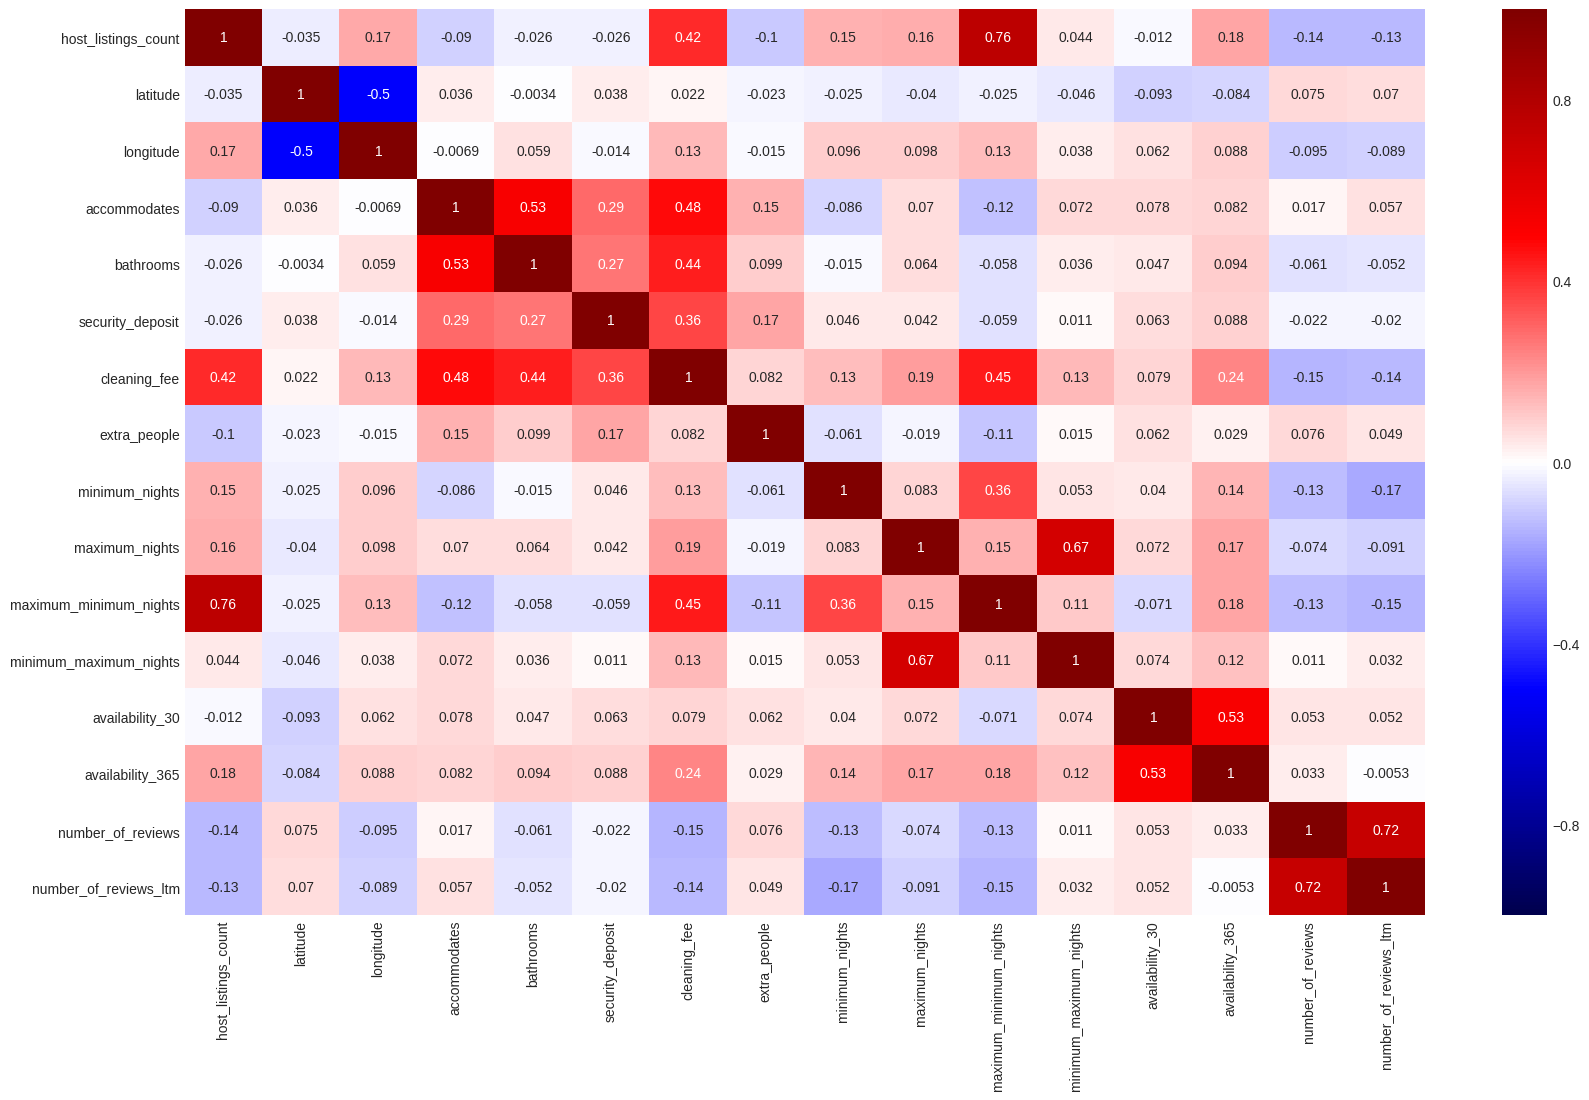

In [117]:
plt.subplots(figsize=(20,12))
#sns.heatmap(data_num.drop('price', axis=1).corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
sns.heatmap(data_num.drop('price',axis = 1).corr(), cmap="seismic", annot=True, vmin=-1, vmax=1); 

# Dealing with outliers


In [118]:
# As we can see there are numerous outliers in our data, let's check what percentage of data lies outside the $800 mark 
print('Percentage of listings with price greater than $800: {} %'.format(sum(data_num['price'] > 800) / len(data_num['price']) * 100 ))
print('Number of listing with price equal to zero: {}'.format(sum(data_num['price'] == 0)))
print('Number of listing that can accomodate more than 16 guests: {}'.format(sum(data['accommodates'] > 16)))

Percentage of listings with price greater than $800: 1.902301550023485 %
Number of listing with price equal to zero: 3
Number of listing that can accomodate more than 16 guests: 7


In [119]:
#Since the percentage of points with price above $800 is very low we can drop the outliers, also lets drop listing with price of 0 
data_num = data_num[data_num['price'] <= 800]
data_num.drop(data_num[data_num['price'] == 0].index,inplace=True) 
data.drop(data[data['accommodates'] > 16].index, inplace = True)

In [120]:
# As we can see there are numerous outliers in our data, let's check what percentage of data lies outside the $800 mark 
print('Percentage of listings with price greater than $800: {} %'.format(sum(data_num['price'] > 800) / len(data_num['price']) * 100 ))
print('Number of listing with price equal to zero: {}'.format(sum(data_num['price'] == 0)))
print('Number of listing that can accomodate more than 16 guests: {}'.format(sum(data['accommodates'] > 16)))

Percentage of listings with price greater than $800: 0.0 %
Number of listing with price equal to zero: 0
Number of listing that can accomodate more than 16 guests: 0


# Implementing Regression Models Trial 1 

In [121]:
X = data_num.drop(columns='price')
y = data_num.price.values

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,lars_path,LassoCV,RidgeCV
from sklearn.pipeline import Pipeline

In [123]:
def linear(dataset,target):
  target = target.reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(dataset,target, random_state=0,test_size = 0.25)
  linreg = LinearRegression()
  scaler = StandardScaler()
  steps = [('scaler', scaler), ('linreg', linreg)]
  lin_pipeline = Pipeline(steps) # define the pipeline object. 
  lin_pipeline.fit(X_train,y_train)
  print("Test score for scaled data: {:.4f}".format(lin_pipeline.score(X_test,y_test)))
  #print("Coefficients: {}".format(linreg.coef_))
  coefs = pd.DataFrame(data = linreg.coef_, columns= dataset.columns)
  print(coefs)

In [124]:
def lassocv(dataset,target):
  X_train, X_test, y_train, y_test = train_test_split(dataset,target, random_state=0,test_size = 0.25)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train) 
  X_test_scaled = scaler.transform(X_test)  
  alphas = 10**np.linspace(-2,3,200)
  lasso = LassoCV(normalize=False,alphas=alphas,cv=12,max_iter=10000,tol=0.1).fit(X_train_scaled, y_train) 
  print("Score without interactions: {:.4f}".format(lasso.score(X_test_scaled, y_test)))
  print('Best alpha value: {:.3f}'.format(lasso.alpha_))
  alphas, _, coefs = lars_path(X_train_scaled, y_train, method='lasso')
  # # plotting the LARS path
  xx = np.sum(np.abs(coefs.T), axis=1)
  xx /= xx[-1]
  plt.figure(figsize=(18,12))
  plt.plot(xx, coefs.T)
  ymin, ymax = plt.ylim()
  plt.vlines(xx, ymin, ymax, linestyle='dashed')
  plt.xlabel('|coef| / max|coef|')
  plt.ylabel('Coefficients')
  plt.title('LASSO Path')
  plt.axis('tight')
  plt.legend(X_train.columns,loc = 'best')
  plt.show()
  print(alphas)

In [125]:
def ridgecv(dataset,target):
  X_train, X_test, y_train, y_test = train_test_split(dataset,target, random_state=0,test_size = 0.25)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train) 
  X_test_scaled = scaler.transform(X_test)  
  alphas = 10**np.linspace(0,200,100) 
  ridge = RidgeCV(normalize=False,alphas=alphas,cv=12).fit(X_train_scaled, y_train) 
  print("R^2 Score: {:.4f}".format(ridge.score(X_test_scaled, y_test)))
  print('Best alpha value: {:.3f}'.format(ridge.alpha_))

In [126]:
def 

SyntaxError: ignored

In [ ]:
linear(X,y)

In [ ]:
lassocv(X,y) 

In [ ]:
ridgecv(X,y)

In [ ]:
d